In [1]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files

In [3]:
uploaded=files.upload()

Saving UserKnowledgeModeling.csv to UserKnowledgeModeling.csv


In [4]:
data=pd.read_csv("UserKnowledgeModeling.csv")

In [5]:
data

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,Very Low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High
...,...,...,...,...,...,...
398,0.61,0.78,0.69,0.92,0.58,High
399,0.78,0.61,0.71,0.19,0.60,Middle
400,0.54,0.82,0.71,0.29,0.77,High
401,0.50,0.75,0.81,0.61,0.26,Middle


In [6]:
data["UNS"].value_counts()

Low         129
Middle      122
High        102
Very Low     26
very_low     24
Name: UNS, dtype: int64

Teniendo en cuenta que hay una categoría que se encuentra discriminada en dos categorías diferentes, probablemente por transcripción, se unificarás las observaciones correspondientes en una sola categoría. Asimismo, las categorizaremos en una escala numérica.

In [7]:
data["UNS"]=data["UNS"].replace("Very Low",0)
data["UNS"]=data["UNS"].replace("very_low",0)
data["UNS"]=data["UNS"].replace("Low",1)
data["UNS"]=data["UNS"].replace("Middle",2)
data["UNS"]=data["UNS"].replace("High",3)
#.....
data

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,0
1,0.05,0.05,0.55,0.60,0.14,1
2,0.08,0.18,0.63,0.60,0.85,3
3,0.20,0.20,0.68,0.67,0.85,3
4,0.22,0.22,0.90,0.30,0.90,3
...,...,...,...,...,...,...
398,0.61,0.78,0.69,0.92,0.58,3
399,0.78,0.61,0.71,0.19,0.60,2
400,0.54,0.82,0.71,0.29,0.77,3
401,0.50,0.75,0.81,0.61,0.26,2


In [8]:
data["UNS"].value_counts()


1    129
2    122
3    102
0     50
Name: UNS, dtype: int64

De acuerdo a la recategorización realizada y a la realizada por el investigador, los 403 estudiantes se han agrupado en 4 niveles para la variable *Nivel de Conocimiento del Usuario*. Es así como 50 individuos se ubican en nivel "Muy Bajo" (0), 129 en "Nivel Bajo" (1), 122 en "Nivel Medio" y 102 estudiantes en "Nivel Alto".

In [9]:
data.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,0
1,0.05,0.05,0.55,0.60,0.14,1
2,0.08,0.18,0.63,0.60,0.85,3
3,0.20,0.20,0.68,0.67,0.85,3
4,0.22,0.22,0.90,0.30,0.90,3


In [10]:
data.describe()

,STG,SCG,STR,LPR,PEG,UNS
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360,1.684864
std,0.212018,0.215531,0.246684,0.257545,0.266775,0.986195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000,1.000000
50%,0.300000,0.300000,0.440000,0.330000,0.400000,2.000000
75%,0.480000,0.510000,0.680000,0.650000,0.660000,3.000000
max,0.990000,0.900000,0.950000,0.990000,0.990000,3.000000


In [11]:
print("Existen {} observaciones en el dataset".format(len(data)))

Existen 403 observaciones en el dataset


In [ ]:
pd.DataFrame(np.unique(data["UNS"],return_counts=True),columns=["Muy Bajo","Bajo","Medio","Alto"]).T

,0,1
Muy Bajo,0,50
Bajo,1,129
Medio,2,122
Alto,3,102


Para efectos de replicar la categorización realizada inicialemente, procedemos a eliminar la variable en la que se agrupaban los estudiantes, quedando de la siguiente forma:

In [12]:
data0=data[["STG",	"SCG",	"STR", "LPR",	"PEG"]]
data0.head()

,STG,SCG,STR,LPR,PEG
0,0.00,0.10,0.50,0.26,0.05
1,0.05,0.05,0.55,0.60,0.14
2,0.08,0.18,0.63,0.60,0.85
3,0.20,0.20,0.68,0.67,0.85
4,0.22,0.22,0.90,0.30,0.90


Vamos a aplicar los algoritmos de Clustering para el conjunto de datos *data 0*
Aplicaremos 4 algoritmos:


1.   K-Means
2.   Clustering jerárquico
3.   DBSCAN
3.   Mean Shift

<function matplotlib.pyplot.show>

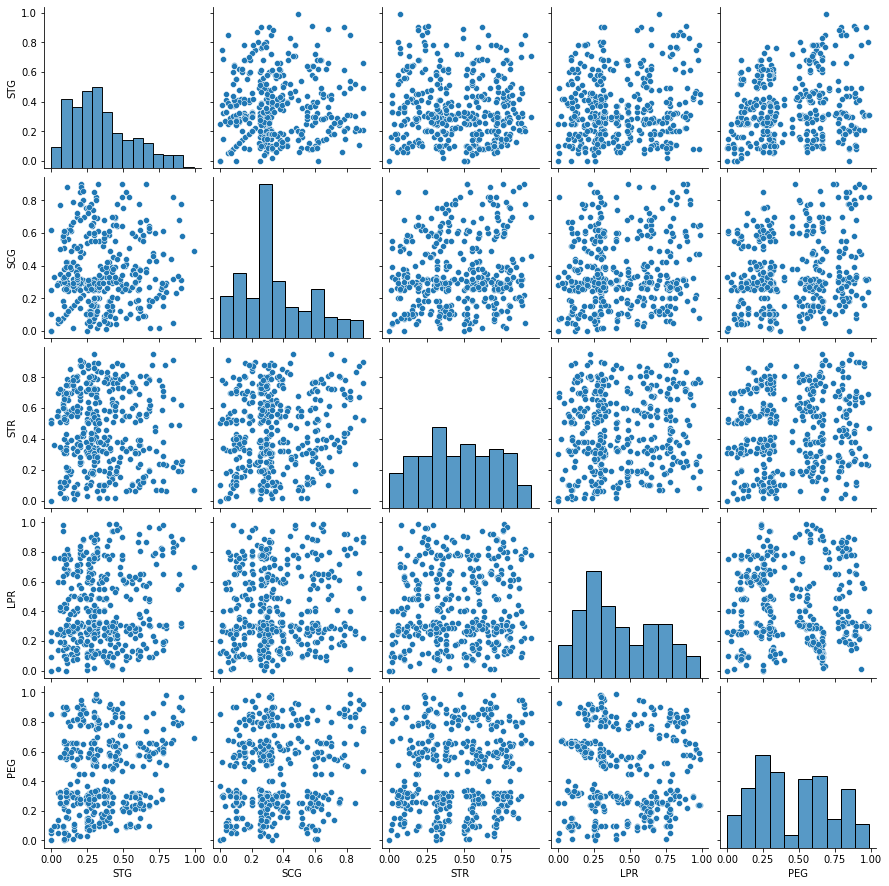

In [13]:
sns.pairplot(data0, aspect=1)
plt.show

## ***K- Means***

In [15]:
from sklearn.preprocessing import StandardScaler

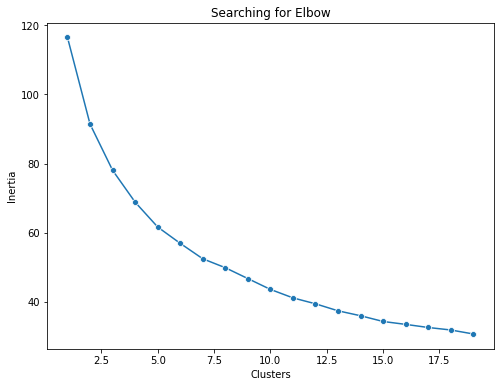

In [16]:
from sklearn.cluster import KMeans

clusters = []
for i in range(1, 20):
    km = KMeans(n_clusters=i).fit(data0)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=list(range(1, 20)), y=clusters, ax=ax, marker="o")
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

Conforme a la gráfica de codo, podemos inferir que el conjunto de datos se puede agrupar en aproximadamente 5 categorías.

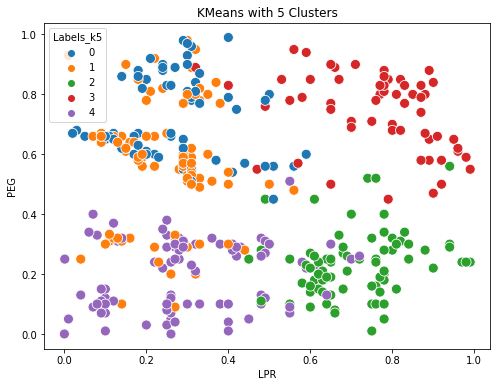

In [22]:
km5 = KMeans(n_clusters=5).fit(data0)
data['Labels_k5'] = km5.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k5'], palette=sns.color_palette('tab10', 5), s=100)
plt.title('KMeans with 5 Clusters')
plt.show()

Agrupando en 5 categorías observamos que no es posible diferenciar claramente entre los grupos 2 y 4, por lo que procederemos a aplicar este algoritmo, probando 4 categorías.

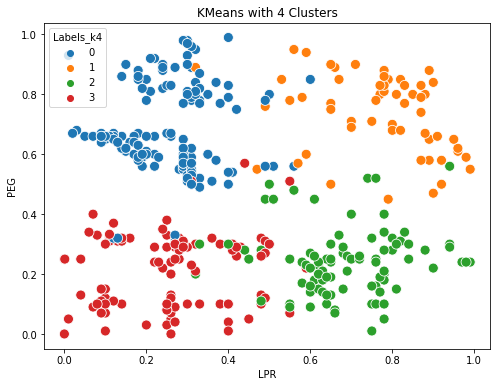

In [24]:
km4 = KMeans(n_clusters=4).fit(data0)
data['Labels_k4'] = km4.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k4'], palette=sns.color_palette('tab10', 4), s=100)
plt.title('KMeans with 4 Clusters')
plt.show()

Agrupando las observaciones en 4 categorías, se evidencian mejor la diferenciación de los grupos, con algunas excepciones en algunos datos, sin embargo, son mucho más notorios estos grupos en comparación con la prueba de los 5 clústers.

De acuerdo a las agrupaciones arrojadas, las categorías son:

- Clúster 0: LPR bajo y PEG alto
- Clúster 1: LPR alto y PEG alto
- Clúster 2: LPR alto y PEG bajo
- Clúster 3: LPR bajo y PEG bajo

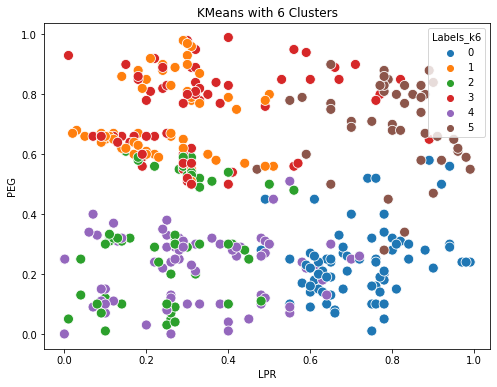

In [26]:
km6 = KMeans(n_clusters=6).fit(data0)
data['Labels_k6'] = km6.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k6'], palette=sns.color_palette('tab10', 6), s=100)
plt.title('KMeans with 6 Clusters')
plt.show()

Con 6 clústers, al igual que el caso de 5, hay grupos en los que no es evidente la diferenciación entre una categoría y otra. Por lo que la distribución de grupos que presenta un mejor panorama de los datos fue el realizado para 4 clústers.

## ***Clustering Jerárquico***

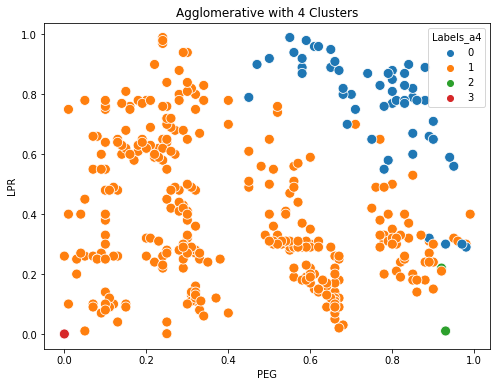

In [27]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=4, linkage='average').fit(data0)

data['Labels_a4'] = agglom.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['PEG'], data['LPR'], hue=data['Labels_a4'], palette=sns.color_palette('tab10', 4), s=100)
plt.title('Agglomerative with 4 Clusters')
plt.show()

Con este algoritmo, no es posible identificar una diferenciación notoria de las agrupaciones.

## ***DBSCAN***

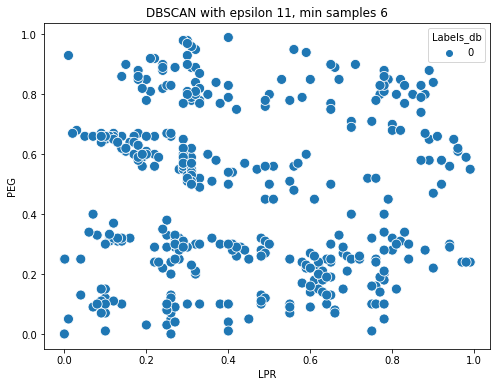

In [28]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=5, min_samples=5).fit(data0)

data['Labels_db'] = db.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_db'], palette=sns.color_palette('tab10', np.unique(db.labels_).shape[0]), s=100)
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

## ***Algoritmo Mean Shift***

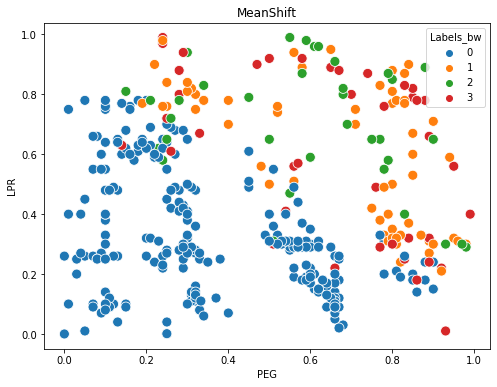

In [29]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(data0, quantile=0.0819)
ms = MeanShift(bandwidth=bandwidth).fit(data0)

data['Labels_bw'] = ms.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['PEG'], data['LPR'], hue=data['Labels_bw'], palette=sns.color_palette('tab10', np.unique(ms.labels_).shape[0]), s=100)
plt.plot()
plt.title('MeanShift')
plt.show()

Con los algoritmos DBSCAN y Mean Shift, al igual que con el aglomerative, no es muy evidente una agrupación de los datos en categorías, por lo que para este caso puntual, resulta conveniente el uso del algortimo K-Means con 4 clústers.

In [30]:
data1=data.copy()

In [31]:
data1

,STG,SCG,STR,LPR,PEG,UNS,Labels_k4,Labels_k5,Labels_k6,Labels_a4,Labels_db,Labels_bw
0,0.00,0.10,0.50,0.26,0.05,0,3,1,2,1,0,0
1,0.05,0.05,0.55,0.60,0.14,1,2,3,0,1,0,0
2,0.08,0.18,0.63,0.60,0.85,3,0,2,3,0,0,1
3,0.20,0.20,0.68,0.67,0.85,3,1,0,3,0,0,1
4,0.22,0.22,0.90,0.30,0.90,3,0,2,3,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.61,0.78,0.69,0.92,0.58,3,1,0,5,0,0,3
399,0.78,0.61,0.71,0.19,0.60,2,0,2,3,1,0,0
400,0.54,0.82,0.71,0.29,0.77,3,0,2,3,1,0,3
401,0.50,0.75,0.81,0.61,0.26,2,2,3,0,1,0,3


In [32]:
data1["UNS"].value_counts()

1    129
2    122
3    102
0     50
Name: UNS, dtype: int64

In [33]:
data1["Labels_k4"].value_counts()

0    137
3    113
2     97
1     56
Name: Labels_k4, dtype: int64

In [36]:
data1["UNS_Kmeans"]=data1["Labels_k4"].replace(1,4)
data1["UNS_Kmeans"]=data1["UNS_Kmeans"].replace(2,3)
data1["UNS_Kmeans"]=data1["UNS_Kmeans"].replace(3,5)
data1["UNS_Kmeans"]=data1["UNS_Kmeans"].replace(0,1)
data1["UNS_Kmeans"]=data1["UNS_Kmeans"].replace(4,0)
data1["UNS_Kmeans"]=data1["UNS_Kmeans"].replace(5,2)
data1["UNS_Original"]=data1["UNS"].replace(0,"Muy Bajo")
data1["UNS_Original"]=data1["UNS_Original"].replace(1,"Bajo")
data1["UNS_Original"]=data1["UNS_Original"].replace(2,"Medio")
data1["UNS_Original"]=data1["UNS_Original"].replace(3,"Alto")
data1

,STG,SCG,STR,LPR,PEG,UNS,Labels_k4,Labels_k5,Labels_k6,Labels_a4,Labels_db,Labels_bw,UNS_Kmeans,UNS_Original
0,0.00,0.10,0.50,0.26,0.05,0,3,1,2,1,0,0,2,Muy Bajo
1,0.05,0.05,0.55,0.60,0.14,1,2,3,0,1,0,0,2,Bajo
2,0.08,0.18,0.63,0.60,0.85,3,0,2,3,0,0,1,1,Alto
3,0.20,0.20,0.68,0.67,0.85,3,1,0,3,0,0,1,0,Alto
4,0.22,0.22,0.90,0.30,0.90,3,0,2,3,1,0,1,1,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.61,0.78,0.69,0.92,0.58,3,1,0,5,0,0,3,0,Alto
399,0.78,0.61,0.71,0.19,0.60,2,0,2,3,1,0,0,1,Medio
400,0.54,0.82,0.71,0.29,0.77,3,0,2,3,1,0,3,1,Alto
401,0.50,0.75,0.81,0.61,0.26,2,2,3,0,1,0,3,2,Medio


In [37]:
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error



In [40]:
(1-accuracy_score(data1["UNS_Kmeans"],data1["UNS"]))*100

89.57816377171216